# Visualización de Datos

En este notebook, se realizarán visualizaciones para comparar los datos originales y los datos limpios. Además, se calcularán indicadores de mejora y se presentarán tablas comparativas. Cada sección incluye una descripción detallada de los gráficos y las comparaciones realizadas.

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos originales
customer_og = pd.read_csv("csv/customer_data.csv")
retail_og = pd.read_csv("csv/retail_data.csv")

# Datos limpios
customer_clean = pd.read_csv("data_clean/customer_data_clean.csv")
retail_clean = pd.read_csv("data_clean/retail_data_clean.csv")

## Comparación de IDs y Duplicados

En esta sección, se analizan los IDs de los datos originales y limpios para verificar la unicidad y la presencia de duplicados. Se grafican barras comparativas que muestran el número de valores únicos antes y después de la limpieza, tanto para los IDs de clientes como para los IDs de transacciones.

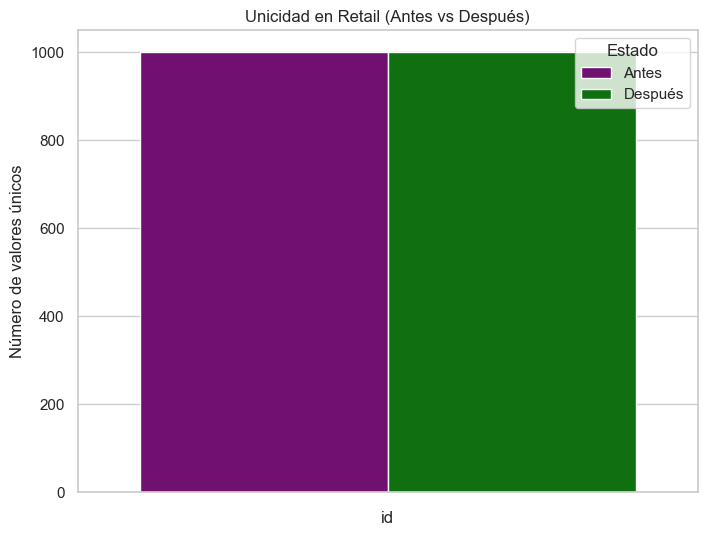

In [135]:
customer_og_unique_id = customer_og['id'].nunique()
customer_clean_unique_id = customer_clean['id'].nunique() if 'id' in customer_clean.columns else 0

customer_data = {
    'Columna': ['id', 'id'],
    'Estado': ['Antes', 'Después'],
    'Unicidad': [customer_og_unique_id, customer_clean_unique_id]
}
customer_df = pd.DataFrame(customer_data)

# Graficar
plt.figure(figsize=(8, 6))
sns.barplot(
    data=customer_df,  
    y='Unicidad', 
    hue='Estado', 
    palette={'Antes': 'purple', 'Después': 'green'}
)

plt.title('Unicidad en Retail (Antes vs Después)')
plt.ylabel('Número de valores únicos')
plt.xlabel('id')
plt.legend(title='Estado', loc='upper right')  # leyenda a un lado
plt.show()


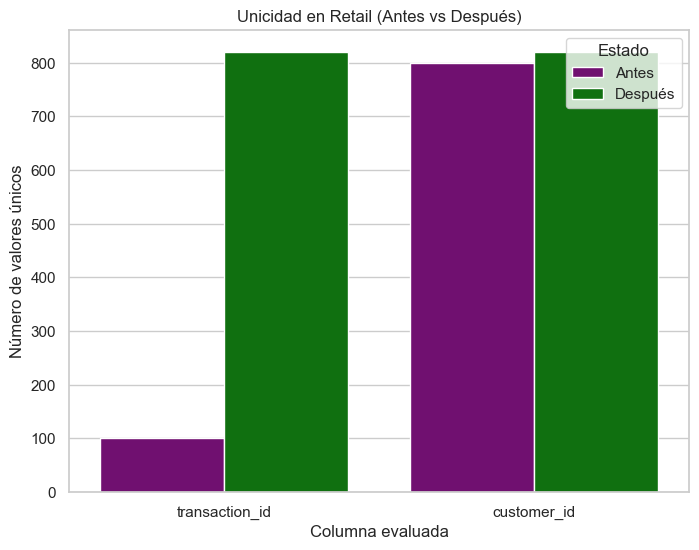

In [136]:
# Comparación usando 'transaction_id'
retail_og_unique_id = retail_og['customer_id'].nunique()
retail_clean_unique_id = retail_clean['transaction_id'].nunique() if 'transaction_id' in retail_clean.columns else 0

# Comparación usando 'customer_id'
retail_og_unique_custid = retail_og['id'].nunique()
retail_clean_unique_custid = retail_clean['customer_id'].nunique()

# Crear DataFrame con columnas separadas: columna analizada + estado (antes/después)
retail_data = {
    'Columna': ['transaction_id', 'transaction_id', 'customer_id', 'customer_id'],
    'Estado': ['Antes', 'Después', 'Antes', 'Después'],
    'Unicidad': [
        retail_og_unique_id, retail_clean_unique_id,
        retail_og_unique_custid, retail_clean_unique_custid
    ]
}
retail_df = pd.DataFrame(retail_data)

# Graficar
plt.figure(figsize=(8, 6))
sns.barplot(
    data=retail_df, 
    x='Columna', 
    y='Unicidad', 
    hue='Estado', 
    palette={'Antes': 'purple', 'Después': 'green'}
)

plt.title('Unicidad en Retail (Antes vs Después)')
plt.ylabel('Número de valores únicos')
plt.xlabel('Columna evaluada')
plt.legend(title='Estado', loc='upper right')  # leyenda a un lado
plt.show()

## Fechas

En esta sección, se evalúan los formatos de las fechas en los datos originales y limpios. Se identifican los formatos más comunes antes de la limpieza y se analiza la distribución temporal de los registros después de la limpieza. Los gráficos incluyen barras para los formatos detectados y barras para la distribución por año.

C:\Users\juana\AppData\Local\Temp\ipykernel_24264\2962750694.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conteo_antes, x="Formato", y="Cantidad", palette="mako")


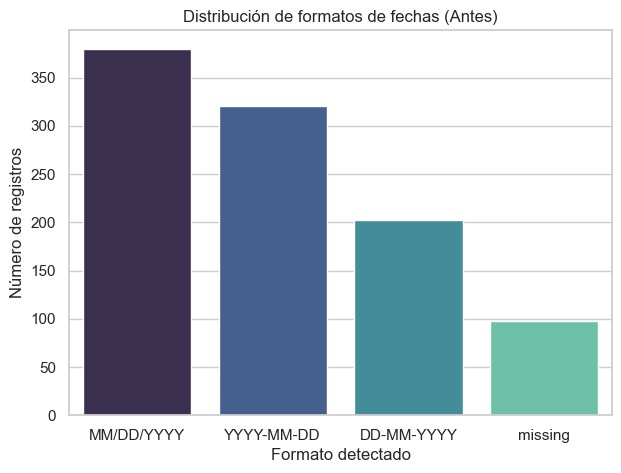

In [137]:
def detectar_formato(fecha):
    if pd.isna(fecha) or str(fecha).strip() == "":
        return "missing"
    f = str(fecha)
    if "/" in f and f.count("/") == 2:
        return "MM/DD/YYYY"
    elif "-" in f and len(f.split("-")[0]) == 4:
        return "YYYY-MM-DD"
    elif "-" in f and len(f.split("-")[0]) == 2:
        return "DD-MM-YYYY"
    else:
        return "Missing"

customer_og["signup_date"] = customer_og["signup_date"].apply(detectar_formato)
conteo_antes = customer_og["signup_date"].value_counts().reset_index()
conteo_antes.columns = ["Formato", "Cantidad"]

# === DESPUÉS: Distribución temporal ===
# Convertir columna de fecha a datetime
customer_clean["signup_date"] = pd.to_datetime(customer_clean["signup_date"], errors="coerce")

# Agrupar por fecha y contar registros
conteo_despues = customer_clean.groupby("signup_date").size().reset_index(name="Cantidad")

# === GRAFICOS ===

# --- ANTES: gráfico de barras ---
plt.figure(figsize=(7,5))
sns.barplot(data=conteo_antes, x="Formato", y="Cantidad", palette="mako")
plt.title("Distribución de formatos de fechas (Antes)")
plt.ylabel("Número de registros")
plt.xlabel("Formato detectado")
plt.show()

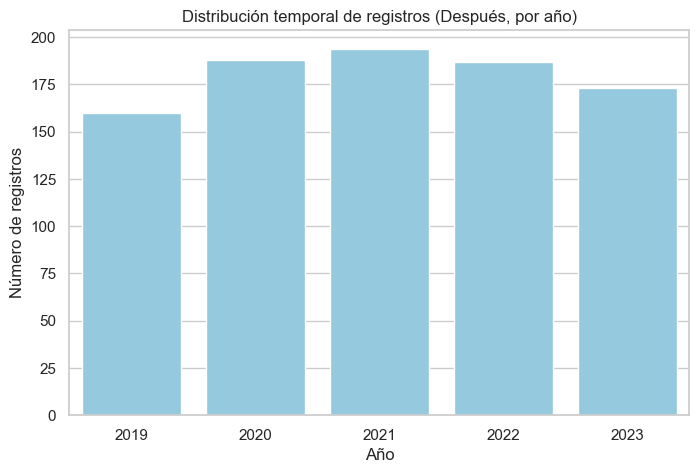

In [138]:
conteo_anio = conteo_despues.groupby(conteo_despues["signup_date"].dt.year).Cantidad.sum().reset_index()
conteo_anio.rename(columns={"signup_date": "Año"}, inplace=True)

plt.figure(figsize=(8,5))
sns.barplot(data=conteo_anio, x="Año", y="Cantidad", color="skyblue")
plt.title("Distribución temporal de registros (Después, por año)")
plt.ylabel("Número de registros")
plt.xlabel("Año")
plt.show()

C:\Users\juana\AppData\Local\Temp\ipykernel_24264\2297122314.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conteo_antes, x="Formato", y="Cantidad", palette="mako")


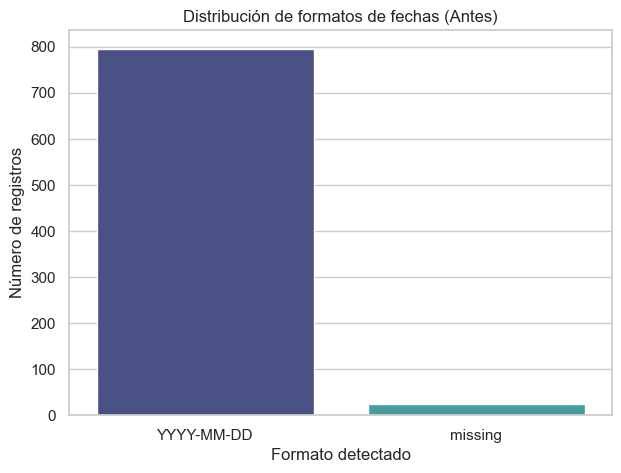

In [139]:
retail_og["purchase_date"] = retail_og["purchase_date"].apply(detectar_formato)
conteo_antes = retail_og["purchase_date"].value_counts().reset_index()
conteo_antes.columns = ["Formato", "Cantidad"]

# Despues
# Convertir columna de fecha a datetime
retail_clean["purchase_date"] = pd.to_datetime(retail_clean["purchase_date"], errors="coerce")

# Agrupar por fecha y contar registros
conteo_despues = retail_clean.groupby("purchase_date").size().reset_index(name="Cantidad")

# Antes
plt.figure(figsize=(7,5))
sns.barplot(data=conteo_antes, x="Formato", y="Cantidad", palette="mako")
plt.title("Distribución de formatos de fechas (Antes)")
plt.ylabel("Número de registros")
plt.xlabel("Formato detectado")
plt.show()

## Amount

En esta sección, se compara la distribución del monto de ventas antes y después de la limpieza. Se utiliza un boxplot para visualizar las diferencias en las distribuciones, desglosadas por categoría de producto. Esto permite identificar posibles anomalías o mejoras en los datos limpios.

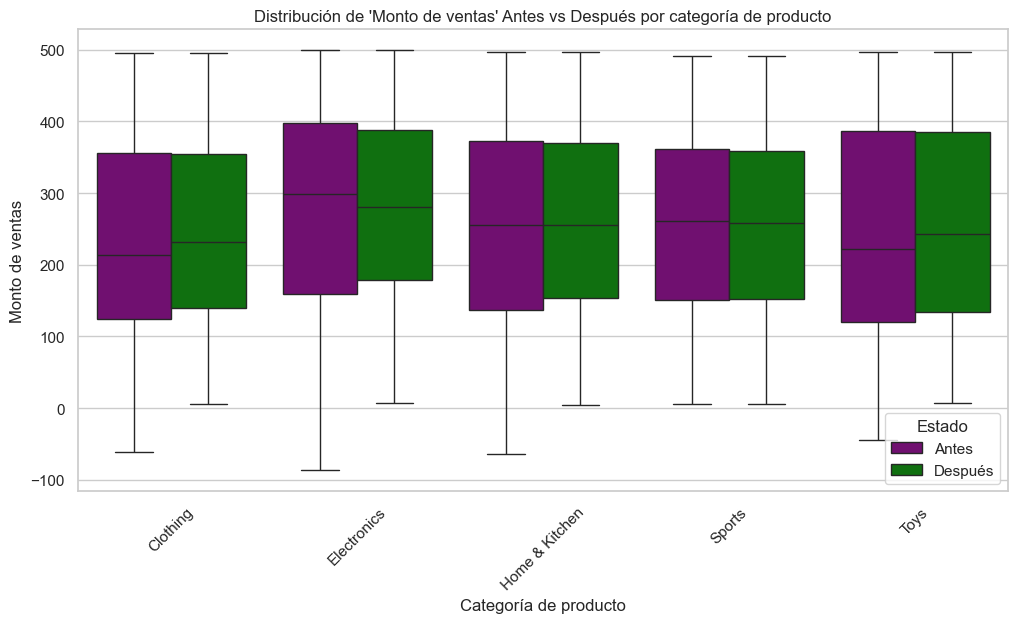

In [143]:
retail_amount_before = retail_og['amount']
retail_amount_after = retail_clean['amount']

# Crear DataFrame
amount_df = pd.DataFrame({
	'Antes': retail_amount_before,
	'Después': retail_amount_after,
	'product_category': retail_og['product_category']
})

# Convertir a formato long (melt)
amount_long = amount_df.melt(
	id_vars='product_category',
	value_vars=['Antes', 'Después'],
	var_name='Estado',
	value_name='Monto de ventas'
)

# Asegurar que 'Monto de ventas' sea numérico
amount_long['Monto de ventas'] = pd.to_numeric(amount_long['Monto de ventas'], errors='coerce')

# Boxplot comparativo filtrado por categoría
plt.figure(figsize=(12,6))
sns.boxplot(
	data=amount_long,
	x='product_category',
	y='Monto de ventas',
	hue='Estado',
	palette=['purple', 'green']
)
plt.title("Distribución de 'Monto de ventas' Antes vs Después por categoría de producto")
plt.ylabel("Monto de ventas")
plt.xlabel("Categoría de producto")
plt.xticks(rotation=45)
plt.legend(title='Estado')
plt.show()


## Email

En esta sección, se analizarán los datos relacionados con los correos electrónicos. Se evaluará la validez de los correos electrónicos y se presentarán gráficos que muestren la proporción de correos válidos e inválidos antes y después de la limpieza.

## Age

En esta sección, se compara la distribución de edades antes y después de la limpieza. Se utiliza un histograma para visualizar las frecuencias de las edades, lo que permite identificar cambios significativos en la calidad de los datos.

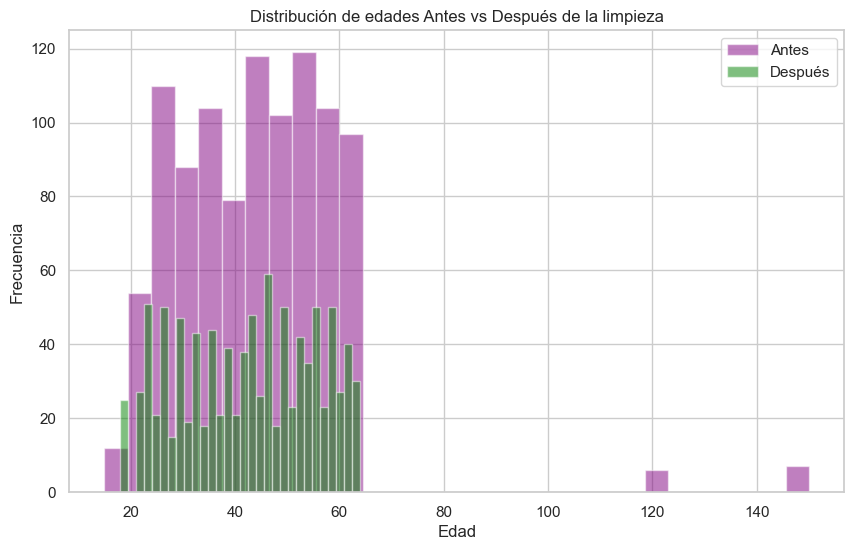

In [ ]:
# Guardar antes y después
ages_before = customer_og['age']
ages_after = customer_clean['age'] 

plt.figure(figsize=(10,6))
plt.hist(ages_before.dropna(), bins=30, alpha=0.5, label='Antes', color='purple')
plt.hist(ages_after.dropna(), bins=30, alpha=0.5, label='Después', color='green')
plt.title("Distribución de edades Antes vs Después de la limpieza")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()